# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

## Навигация

- [LogisticRegression](#LogisticRegression)
- [DecisionTreeClassifier](#DecisionTreeClassifier)
- [RandomForestClassifier](#RandomForestClassifier)
- [PyTorch Neural Network](#PyTorch-Neural-Network)

In [1]:
import os
from typing import Tuple

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

import torch
from torchmetrics import Accuracy

In [2]:
DATA_PATH = os.path.join('..', 'datasets')
MODELS_PATH = os.path.join('..', 'models')

RANDOM_STATE = 42

BATCH_SIZE = 64
INPUT_SIZE = 2
HIDDEN_SIZE = 5
OUTPUT_SIZE = 1
EPOCHS_NUM = 100
LEARNING_RATE = 1e-3

In [3]:
def visualize_predicted_probability(predicted_probability):
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.scatter(X_test['x1'], X_test['x2'], c=predicted_probability)
    plt.show()

In [4]:
df = pd.read_csv(os.path.join(DATA_PATH, 'data.csv'), index_col=0)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


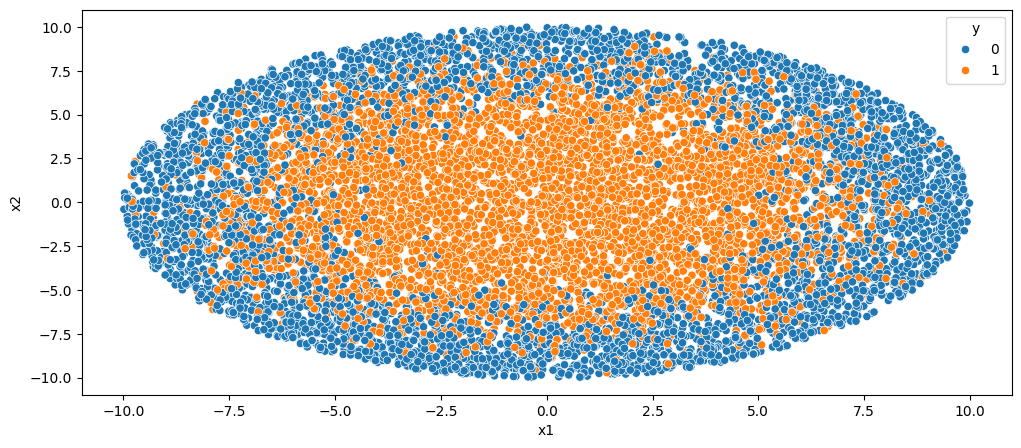

In [5]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(data=df, x='x1', y='x2', hue='y', ax=ax)
plt.show()

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [6]:
# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(
    df[['x1', 'x2']], df['y'],
    test_size=.33,
    random_state=RANDOM_STATE,
)

## LogisticRegression

[к навигации](#Навигация)

Точность нашей модели 0.5963636363636363


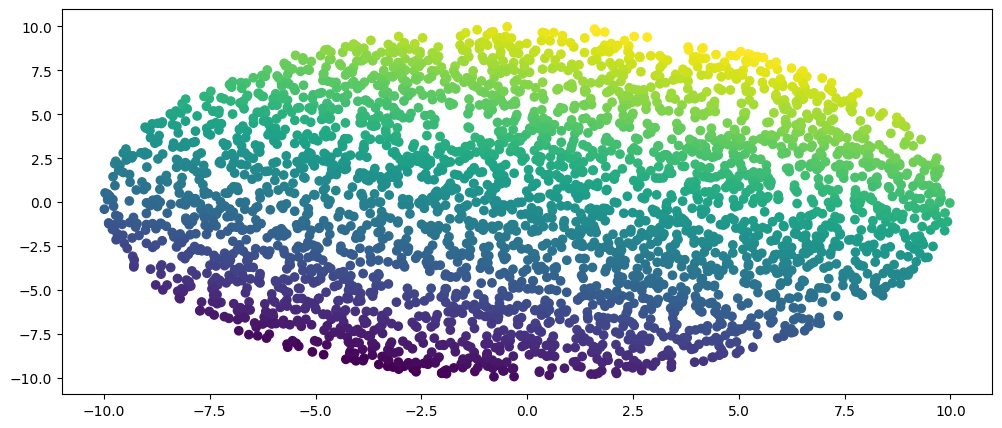

In [7]:
# Ваш код для Логистической регрессии
# -----------------------------------------------------------
log_reg_model = LogisticRegression(random_state=RANDOM_STATE)
log_reg_model.fit(X_train, y_train)

predict_logit = log_reg_model.predict(X_test)
predict_log_proba = log_reg_model.predict_proba(X_test)[:, 1]
# -----------------------------------------------------------


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
visualize_predicted_probability(predict_log_proba)

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.8384848484848485


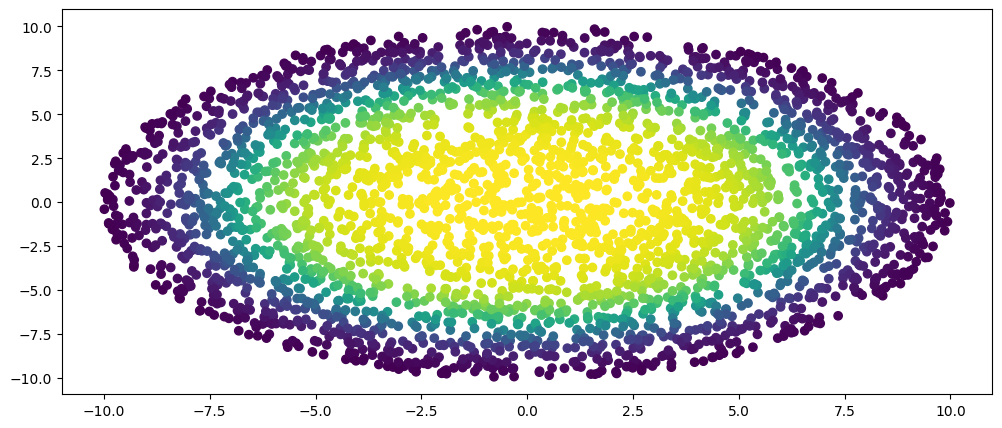

In [8]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

# ваш код для фичей и новой модели
# -----------------------------------------------------------------------
df_new['new_feature_1'] = df_new['x1'] ** 2 + df_new['x2'] ** 2

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    df_new[['x1', 'x2', 'new_feature_1']], df_new['y'],
    test_size=.33,
    random_state=RANDOM_STATE,
)

log_reg_model_new = LogisticRegression(random_state=RANDOM_STATE)
log_reg_model_new.fit(X_train_new, y_train_new)

predict_logit_new = log_reg_model_new.predict(X_test_new)
predict_log_proba_new = log_reg_model_new.predict_proba(X_test_new)[:, 1]
# -----------------------------------------------------------------------

print(f'Точность нашей модели {accuracy_score(predict_logit_new, y_test_new)}')

visualize_predicted_probability(predict_log_proba_new)

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

## DecisionTreeClassifier

[к навигации](#Навигация)

Точность нашей модели 0.76


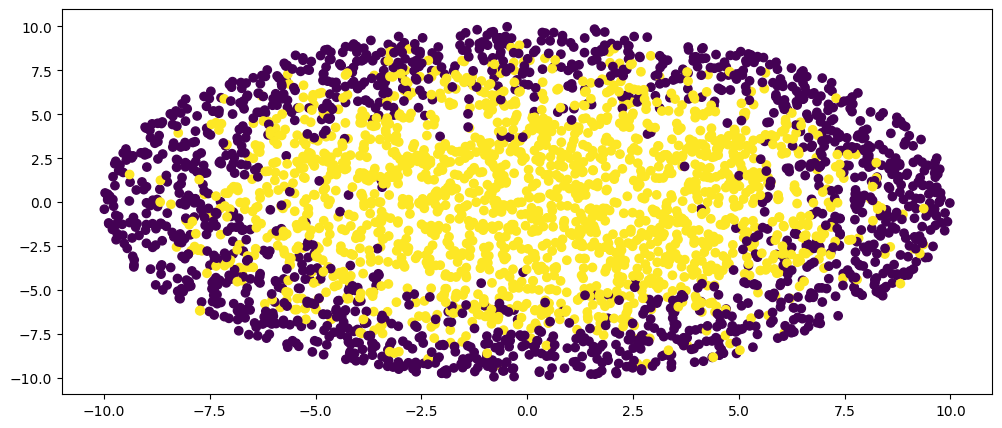

In [9]:
# Ваш код
# --------------------------------------------------------------------
tree_model = DecisionTreeClassifier(random_state=RANDOM_STATE)
tree_model.fit(X_train, y_train)

predict_tree = tree_model.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = tree_model.predict_proba(X_test)[:, 1]
# --------------------------------------------------------------------

visualize_predicted_probability(predict_tree_proba)

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

## RandomForestClassifier

[к навигации](#Навигация)

Точность нашей модели 0.8087878787878788


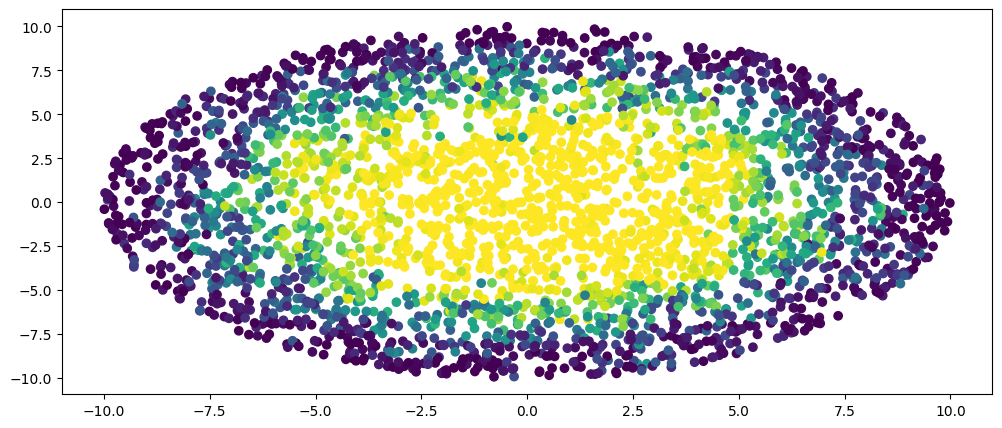

In [10]:
# Ваш код
# ----------------------------------------------------------------------
forest_model = RandomForestClassifier(random_state=RANDOM_STATE)
forest_model.fit(X_train, y_train)

predict_forest = forest_model.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = forest_model.predict_proba(X_test)[:, 1]
# ----------------------------------------------------------------------

visualize_predicted_probability(predict_forest_proba)

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадки и копипастим все нужное сюда!

## PyTorch Neural Network

[к навигации](#Навигация)

In [11]:
sc = StandardScaler()
sc.fit(X_train.values)

StandardScaler()

In [12]:
def create_data_loaders(
    X_train: np.ndarray,
    X_test: np.ndarray,
    y_train: np.ndarray,
    y_test: np.ndarray,
    batch_size: int,
) -> Tuple[torch.utils.data.DataLoader, torch.utils.data.DataLoader]:

    train_tensor = torch.utils.data.TensorDataset(
        torch.tensor(X_train, dtype=torch.float32),
        torch.tensor(y_train, dtype=torch.float32),
    )
    train_data_loader = torch.utils.data.DataLoader(
        dataset=train_tensor,
        batch_size=batch_size,
        shuffle=True,
    )

    test_tensor = torch.utils.data.TensorDataset(
        torch.tensor(X_test, dtype=torch.float32),
        torch.tensor(y_test, dtype=torch.float32),
    )
    test_data_loader = torch.utils.data.DataLoader(
        dataset=test_tensor,
        batch_size=batch_size,
        shuffle=False,
    )

    return train_data_loader, test_data_loader


def create_neural_model(
    input_size: int,
    hidden_size: int,
    output_size: int,
) -> torch.nn.modules.container.Sequential:

    model = torch.nn.Sequential(
        # 1-ый скрытый слой
        torch.nn.Linear(in_features=input_size, out_features=hidden_size),
        torch.nn.Sigmoid(),

        # 2-ой скрытый слой
        torch.nn.Linear(in_features=hidden_size, out_features=hidden_size),
        torch.nn.Sigmoid(),

        # Выходной слой
        torch.nn.Linear(in_features=hidden_size, out_features=output_size),
        torch.nn.Sigmoid(),
    )

    return model


def train_neural_model(
    epochs: int,
    train_data_loader: torch.utils.data.DataLoader,
    test_data_loader: torch.utils.data.DataLoader,
    model: torch.nn.modules.container.Sequential,
    loss_fn,
    optimizer,
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:

    train_loss_values = np.empty(epochs)
    valid_loss_values = np.empty(epochs)
    train_accuracy_values = np.empty(epochs)
    valid_accuracy_values = np.empty(epochs)

    for epoch in range(epochs):
        batches_num = len(train_data_loader)
        running_loss = np.empty(batches_num)
        running_acc = np.empty(batches_num)
        model.train()
        for batch, (features, label) in enumerate(train_data_loader):
            # Reset gradients
            optimizer.zero_grad()

            output = model(features)

            # Calculate error and backpropagate
            loss = loss_fn(output, label)
            loss.backward()

            acc = accuracy(output, label).item()

            # Update weights with gradients
            optimizer.step()

            running_loss[batch] = loss.item()
            running_acc[batch] = acc

        train_loss_values[epoch] = running_loss.mean()
        train_accuracy_values[epoch] = running_acc.mean()

        if epoch % 20 == 0:
            print(f'EPOCH {epoch}: train_loss: {train_loss_values[epoch]} train_acc: {train_accuracy_values[epoch]}')


        # Run validation
        batches_num = len(test_data_loader)
        running_loss = np.empty(batches_num)
        running_acc = np.empty(batches_num)
        model.eval()
        for batch, (features, label) in enumerate(test_data_loader):
            output = model(features)
            # Calculate error and backpropagate
            loss = loss_fn(output, label)

            acc = accuracy(output, label).item()

            running_loss[batch] = loss.item()
            running_acc[batch] = acc

        valid_loss_values[epoch] = running_loss.mean()
        valid_accuracy_values[epoch] = running_acc.mean()

        if epoch % 20 == 0:
            print(f'EPOCH {epoch}: valid_loss: {valid_loss_values[epoch]} valid_acc: {valid_accuracy_values[epoch]}')

    return train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy_values


def plot_history(train, valid):
    fig, ax = plt.subplots(figsize=(12, 5))

    ax.plot(train, label='train')
    ax.plot(valid, label='valid')
    ax.legend()

    plt.show()

In [13]:
train_data_loader, test_data_loader = create_data_loaders(
    sc.transform(X_train.values), sc.transform(X_test.values),
    y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1),
    BATCH_SIZE,
)
neural_model = create_neural_model(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
optimizer = torch.optim.Adam(neural_model.parameters(), lr=LEARNING_RATE)
loss_fn = torch.nn.BCELoss()
accuracy = Accuracy(task='binary')

train_loss_values, train_accuracy_values, valid_loss_values, valid_accuracy_values = train_neural_model(
    EPOCHS_NUM, train_data_loader, test_data_loader, neural_model, loss_fn, optimizer)

EPOCH 0: train_loss: 0.7025124158178057 train_acc: 0.5061688309624082
EPOCH 0: valid_loss: 0.6935348602441641 valid_acc: 0.517060630596601
EPOCH 20: train_loss: 0.6749633834475562 train_acc: 0.6612418833233061
EPOCH 20: valid_loss: 0.6731577985561811 valid_acc: 0.6729767632025939
EPOCH 40: train_loss: 0.4656181891759237 train_acc: 0.8216179654711768
EPOCH 40: valid_loss: 0.4635775605073342 valid_acc: 0.8210803958085867
EPOCH 60: train_loss: 0.39199701008342563 train_acc: 0.8255817101115273
EPOCH 60: valid_loss: 0.3931930787288226 valid_acc: 0.8228832804239713
EPOCH 80: train_loss: 0.3798024807657514 train_acc: 0.8287067101115272
EPOCH 80: valid_loss: 0.38118927066142744 valid_acc: 0.8288928958085867


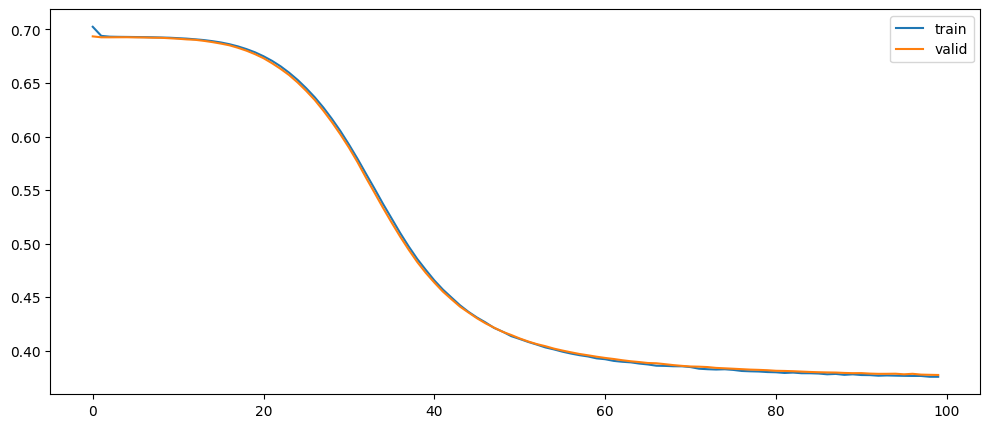

In [14]:
plot_history(train_loss_values, valid_loss_values)

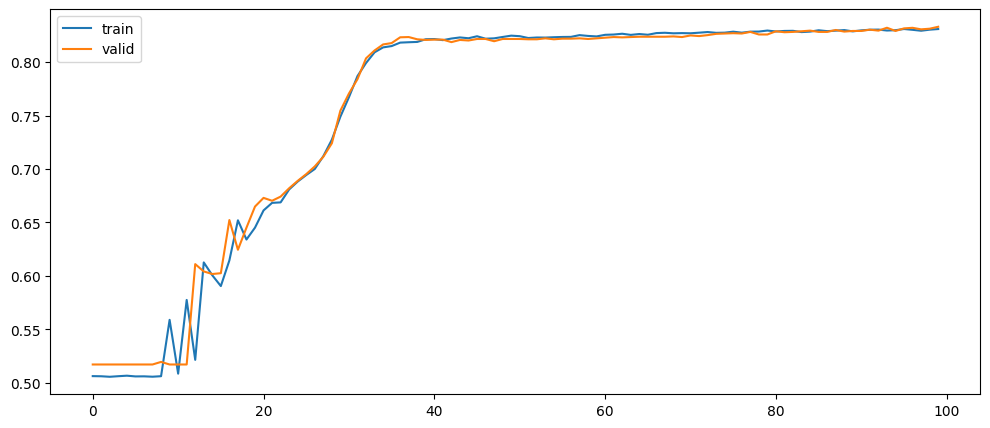

In [15]:
plot_history(train_accuracy_values, valid_accuracy_values)

In [16]:
torch.save(neural_model, os.path.join(MODELS_PATH, 'bloop_nn.pth'))

In [17]:
neural_model = torch.load(os.path.join(MODELS_PATH, 'bloop_nn.pth'))
neural_model.eval()

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=5, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=5, out_features=1, bias=True)
  (5): Sigmoid()
)

In [18]:
with torch.no_grad():
    predict_neural_proba = neural_model(torch.tensor(sc.transform(X_test.values), dtype=torch.float32))
predict_neural = torch.round(predict_neural_proba)

print(f'Точность нашей модели {accuracy_score(predict_neural, y_test)}')

Точность нашей модели 0.8333333333333334


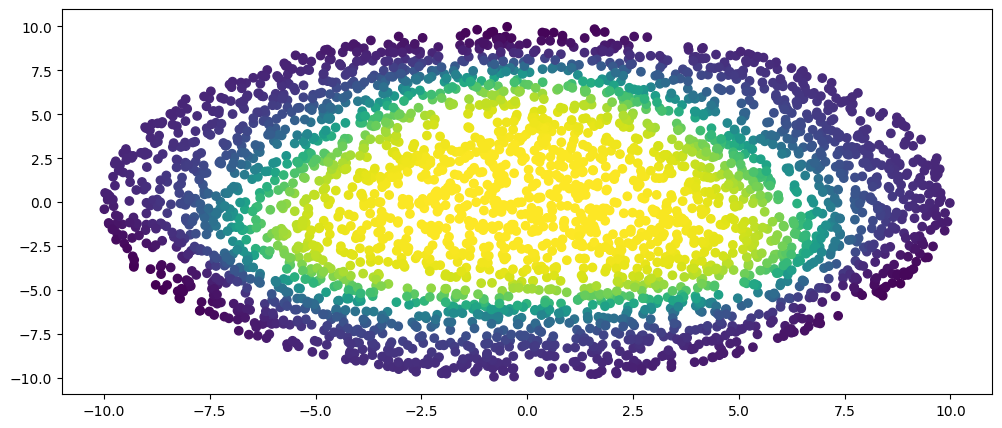

In [19]:
visualize_predicted_probability(predict_neural_proba)